## Choosing Dataset:

**TMDb movie data**

*Questions*

1. Which genres are most popular from year to year?
    - (What changed between 2015 to 2016)
2. What kinds of properties are associated with movies that have high revenues?
    - or what are the attributes of the movie with high revenues
    - like What properties/attributes does the movies, which have done well at the box office, have?
    - For Instance, Whether the popularity of the movie is dependent on the movie's budget?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Load Data from a csv file
data = pd.read_csv("tmdb-movies.csv")

In [6]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# DATA WRANGLING

# cast, homepage, director, tagline, keywords, genres, production_companies columns have less than 10866 values
# so we will inspect these columns

data['homepage'] = data['homepage'].fillna('Homepage Unavailable')
data['cast'] = data['cast'].fillna('Information not available')
data['director'] = data['director'].fillna('Information not available')
data['tagline'] =data['tagline'].fillna('Will Update soon!')
data['keywords'] = data['keywords'].fillna('')
data['overview'] =data['overview'].fillna('Will Update soon!')
data['genres'] = data['genres'].fillna('NA')
data['production_companies'] = data['production_companies'].fillna('')
data['imdb_id'] = data['imdb_id'].fillna('NA')
# print(data['homepage'])
# data['imdb_id'].isnull().values.any()
# data['imdb_id'].isnull().sum()

In [9]:
# data.info()
data.describe()

# so we can see that there is no revenue and budget for some of the movies

# count_budget = 0
# count_revenue = 0
# for i in range(len(data)):
#     count_budget = (count_budget + 1) if data.loc[i, 'budget'] == 0 else count_budget
#     count_revenue = (count_revenue + 1) if data.loc[i, 'revenue'] == 0 else count_revenue
# print(count_budget, count_revenue)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Posing 1st Question

**Which genres are most popular from year to year?**

In [10]:
# Range of release years
print("From: {} to {}.\n".format(data['release_year'].min(), data['release_year'].max()))
from_1960_to_2015 = range(data['release_year'].min(), data['release_year'].max() + 1)

genre_column = list(data["genres"])
genre_set = set()
for i in genre_column:
    row = i.split("|")
    for value in row:
        genre_set.add(value)
    
print(len(genre_set), genre_set)
# total -> 20 genres with one extra 'NA' genre which is substituted in place of the genres 
# with missing values in the original data

From: 1960 to 2015.

21 {'Drama', 'Comedy', 'War', 'Horror', 'Animation', 'Western', 'Documentary', 'Mystery', 'Foreign', 'Crime', 'Family', 'Adventure', 'Thriller', 'History', 'NA', 'Music', 'TV Movie', 'Fantasy', 'Action', 'Romance', 'Science Fiction'}


In [11]:
# row by column dataframe of years by genres
years_by_genres = pd.DataFrame(index = from_1960_to_2015, columns = genre_set)
years_by_genres = years_by_genres.fillna(0)
years_by_genres.head()

for i in range(len(data)):
    genres_per_year = data.loc[i, 'genres'].split("|")
    year = data.loc[i, 'release_year']
    for val in genres_per_year:
        years_by_genres.loc[year, val] = years_by_genres.loc[year, val] + 1
        
years_by_genres.describe()

,Drama,Comedy,War,Horror,Animation,Western,Documentary,Mystery,Foreign,Crime,...,Adventure,Thriller,History,NA,Music,TV Movie,Fantasy,Action,Romance,Science Fiction
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,85.017857,67.732143,4.821429,29.232143,12.482143,2.946429,9.285714,14.464286,3.357143,24.196429,...,26.267857,51.928571,5.964286,0.410714,7.285714,2.982143,16.357143,42.589286,30.571429,21.964286
std,78.753815,59.957710,4.204358,30.901010,15.142944,2.186069,17.247624,12.575538,4.768947,19.569382,...,21.096739,51.350793,4.895134,0.826312,7.581591,4.300068,14.238780,35.981195,26.782530,19.393499
min,13.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000
25%,21.750000,13.000000,2.000000,8.750000,2.000000,1.000000,0.750000,5.000000,0.000000,7.750000,...,7.750000,15.250000,3.000000,0.000000,2.750000,0.000000,3.000000,12.500000,6.750000,6.000000
50%,53.000000,52.500000,4.000000,18.000000,4.500000,3.000000,2.000000,9.000000,1.000000,19.500000,...,18.500000,30.500000,4.000000,0.000000,4.000000,1.000000,14.000000,32.500000,21.500000,18.000000
75%,110.750000,101.750000,6.250000,29.250000,21.500000,4.000000,6.250000,22.500000,4.000000,35.250000,...,40.250000,67.750000,8.000000,1.000000,10.250000,3.500000,23.250000,63.250000,48.250000,28.250000
max,284.000000,198.000000,23.000000,125.000000,50.000000,8.000000,73.000000,51.000000,18.000000,71.000000,...,72.000000,179.000000,24.000000,4.000000,33.000000,20.000000,49.000000,129.000000,85.000000,86.000000


#### These statistics clearly show that "Drama" genre is the most watched genre overall until now, followed by "Comedy" genre.
    - So, the maximum number of movies fall in the category of Drama genre

Year		Popular Genres

1960             | Drama | 
1961             | Drama | 
1962             | Drama | 
1963    | Drama | Comedy | 
1964             | Drama | 
1965             | Drama | 
1966    | Drama | Comedy | 
1967            | Comedy | 
1968             | Drama | 
1969             | Drama | 
1970             | Drama | 
1971             | Drama | 
1972             | Drama | 
1973             | Drama | 
1974             | Drama | 
1975             | Drama | 
1976             | Drama | 
1977             | Drama | 
1978             | Drama | 
1979             | Drama | 
1980             | Drama | 
1981             | Drama | 
1982             | Drama | 
1983             | Drama | 
1984             | Drama | 
1985            | Comedy | 
1986             | Drama | 
1987            | Comedy | 
1988            | Comedy | 
1989            | Comedy | 
1990             | Drama | 
1991             | Drama | 
1992             | Drama | 
1993             | Drama | 
1994            | Comedy |

E:\CHITKARA\ML\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


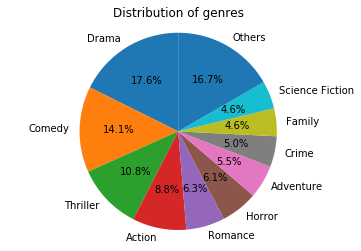

In [17]:
# Most popular genres from year to year
year_to_year = pd.Series(np.zeros(len(years_by_genres)), index=from_1960_to_2015)

# as i could see more than 1 genre having max values so i will individually loop through each row
for i in from_1960_to_2015:
    maximum = years_by_genres.max(axis=1).loc[i]
    genre_temp = "| "
    for j in genre_set:
        if maximum == years_by_genres.loc[i, j]:
            genre_temp = genre_temp + j + " | "
    year_to_year.loc[i] = genre_temp
    
print("Year\t\tPopular Genres\n\n{}".format(year_to_year))

# Pie chart for distribution of genres
genres_total = pd.Series(np.zeros(len(genre_set)), index = genre_set)
for j in genre_set:
    genres_total.loc[j] = years_by_genres[j].sum()
    
fig, axis = plt.subplots()
# top movies genre per year shown in pi chart
n = 10
distribution = genres_total.sort_values(ascending = False)[0:n]
genre_dist = list(distribution.keys())[0:n]
genre_dist.append("Others")
distribution.set_value("Others", (genres_total.sort_values(ascending=False).values)[n:].sum())
# print(distribution)
axis.pie(distribution, labels = genre_dist, autopct = '%1.1f%%', startangle = 90)
axis.axis('equal')
plt.title("Distribution of genres")
plt.show()

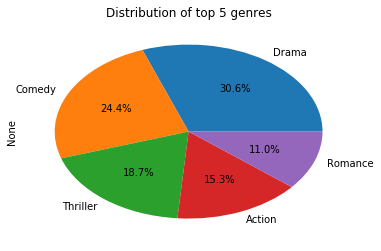

In [20]:
genres_total.sort_values(ascending=False)[:5].plot(kind="pie",
                                                   autopct = '%1.1f%%',
                                                   title="Distribution of top 5 genres",
                                                   startangle = 0)

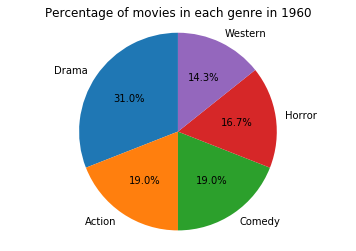

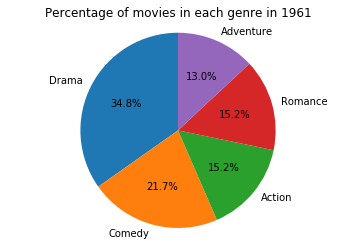

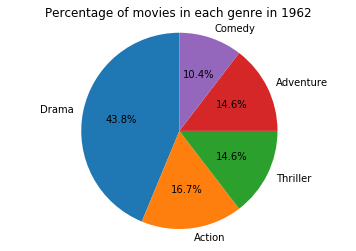

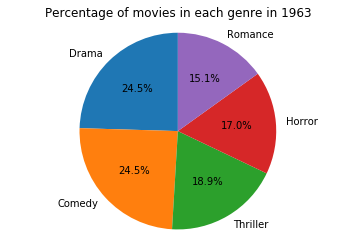

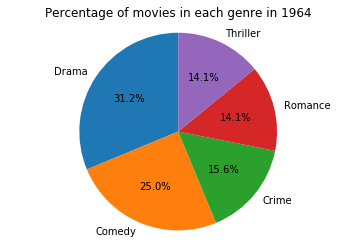

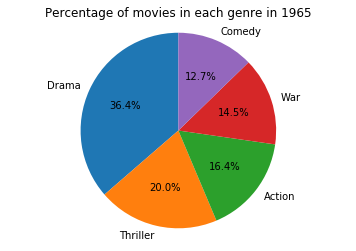

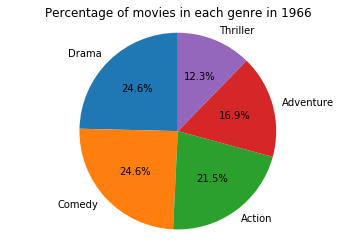

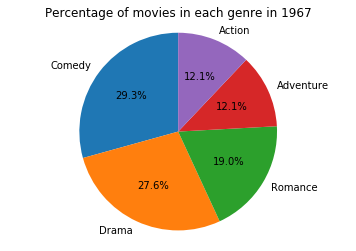

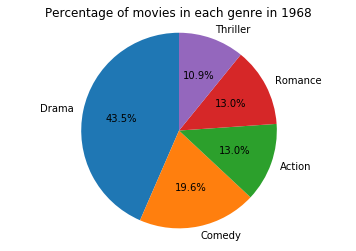

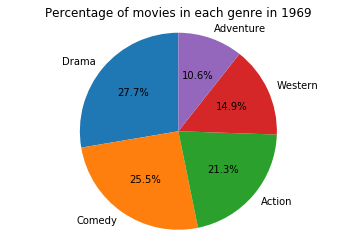

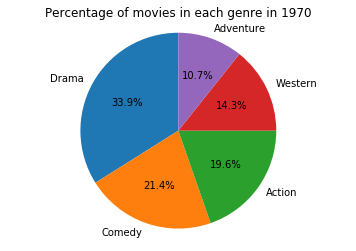

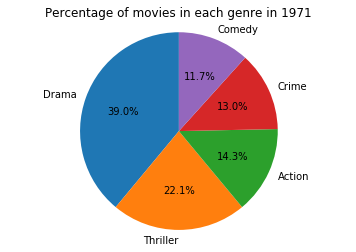

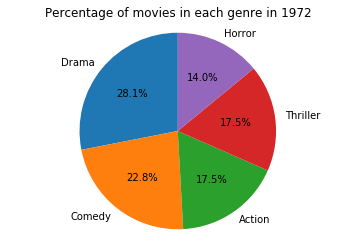

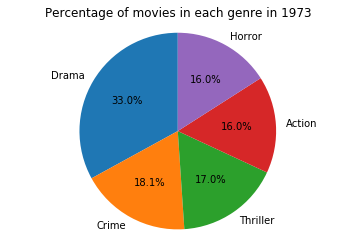

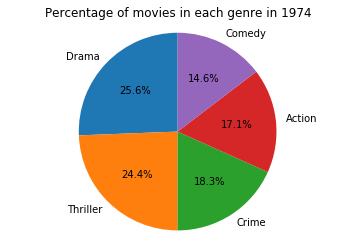

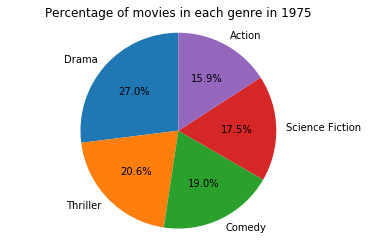

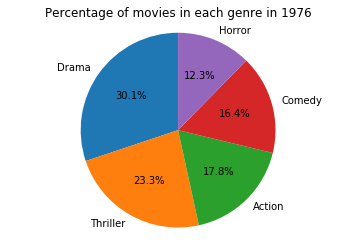

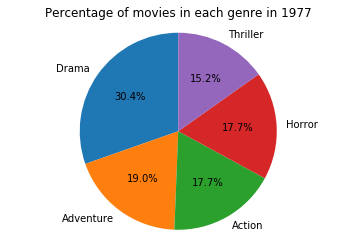

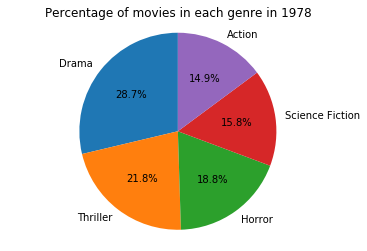

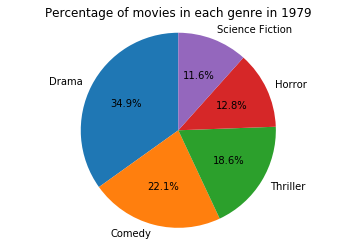

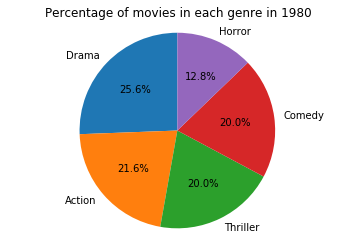

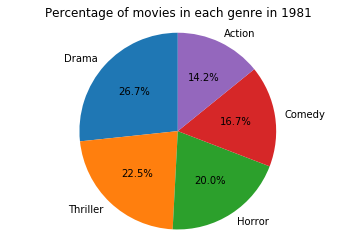

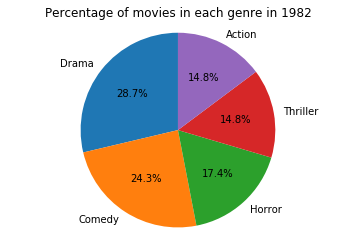

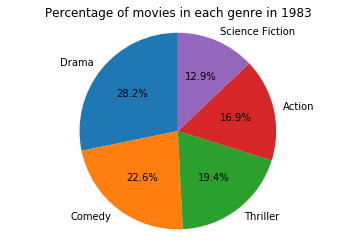

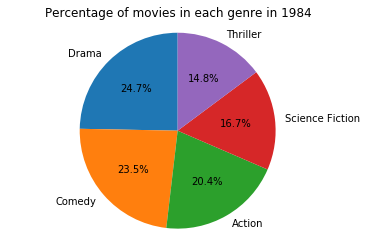

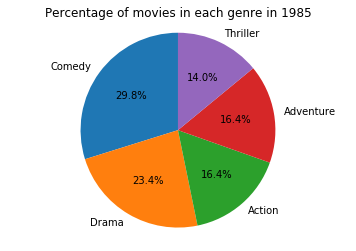

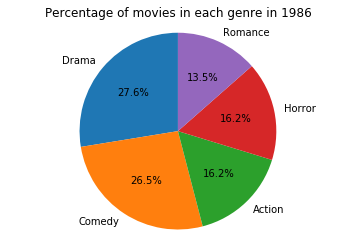

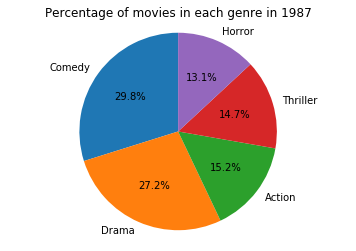

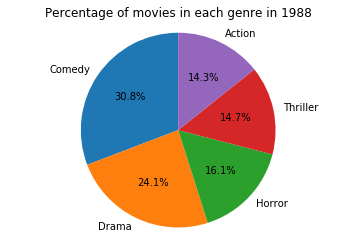

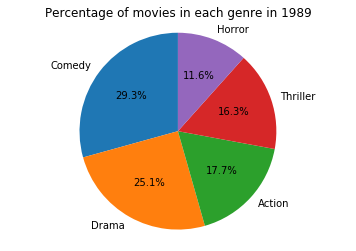

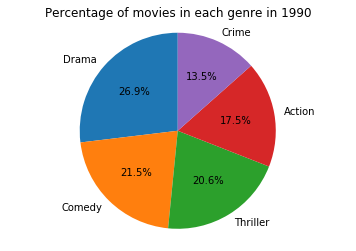

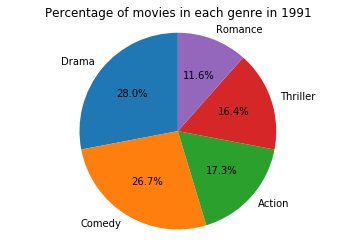

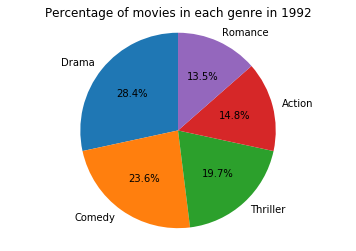

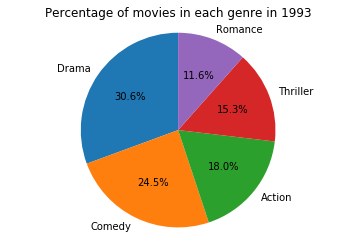

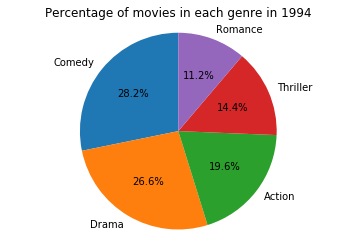

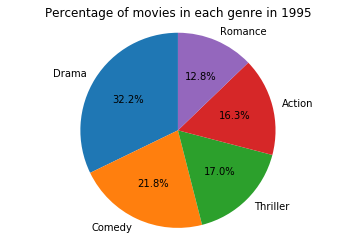

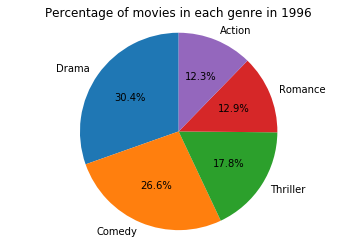

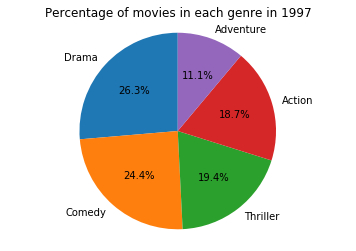

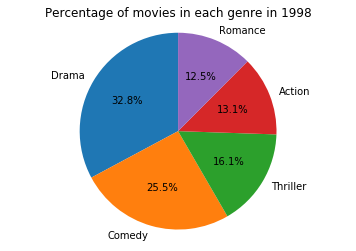

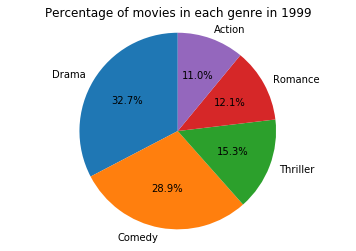

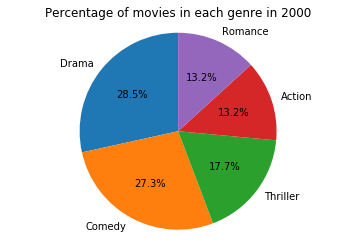

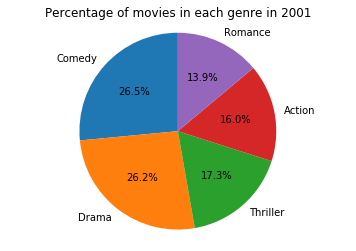

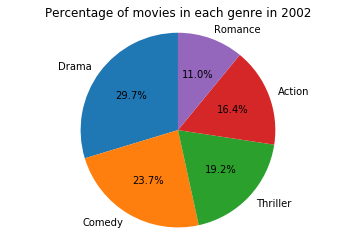

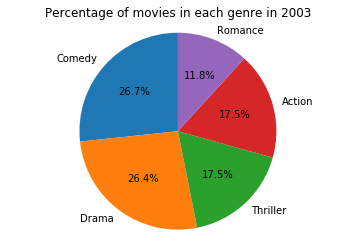

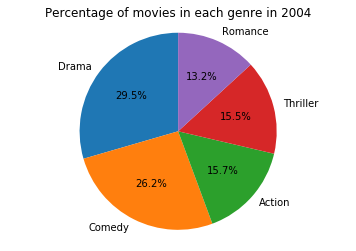

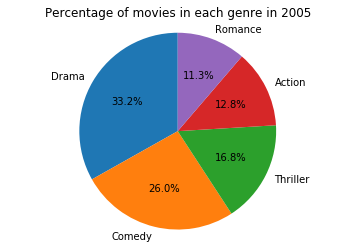

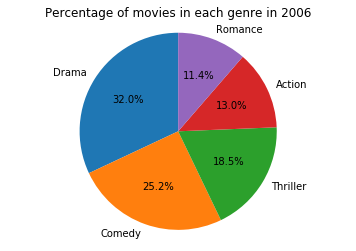

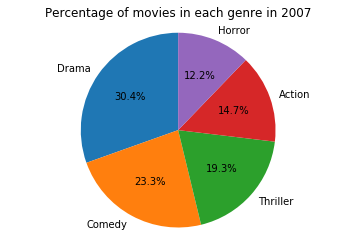

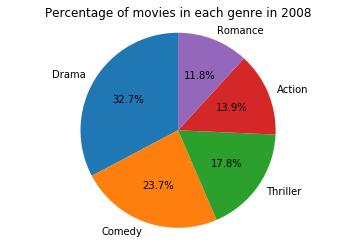

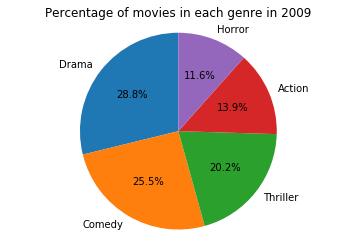

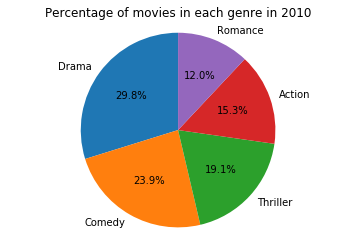

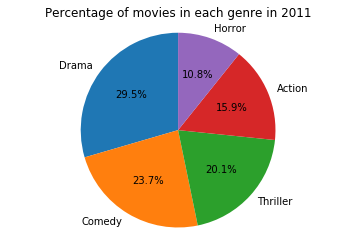

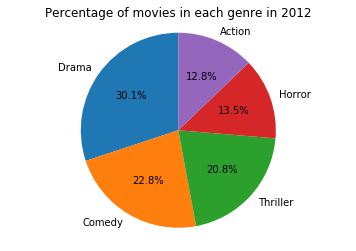

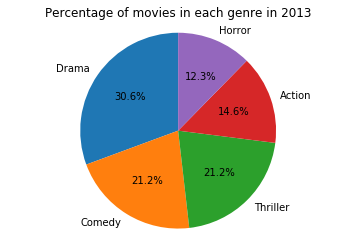

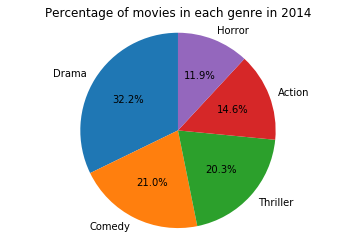

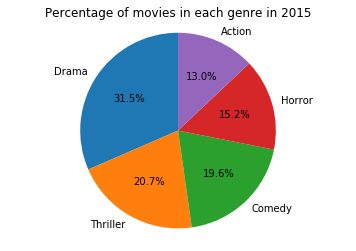

In [21]:
# Distribution of Movies per year
for i in from_1960_to_2015:
    fig, axis = plt.subplots()
    # top 5 movies per year shown in pi chart
    n = 5
    distribution = years_by_genres.loc[i, :].sort_values(ascending = False)[0:n]
    genre_dist = list(distribution.keys())[0:n]
    axis.pie(distribution, labels = genre_dist, autopct = '%1.1f%%', startangle = 90)
    axis.axis('equal')
    plt.title("Percentage of movies in each genre in {}".format(i))
    plt.show()

In [37]:
def standardize(x):
    x_standardized = (x - x.mean()) / x.std(ddof = 0)
    return x_standardized

# standardize popularity
std_pop =  standardize(data['popularity'])

# Exploring profit generated by the movies
profit = data['revenue'].sub(data['budget'], axis=0)

profit_temp = {'id': data['id'],
               'revenue': data['revenue'].values,
               'profits_per_movie': profit.values,
               'release_year': data['release_year'].values,
               'popularity': data['popularity'].values,
               'std_popularity': std_pop.values,
               'budget': data['budget'].values
                #'genres': data['genres'].values
              }

profitable_std_movies = pd.DataFrame(profit_temp)
profitable_std_movies.head()

,budget,id,popularity,profits_per_movie,release_year,revenue,std_popularity
0,150000000,135397,32.985763,1363528810,2015,1513528810,32.334830
1,150000000,76341,28.419936,228436354,2015,378436354,27.769638
2,110000000,262500,13.112507,185238201,2015,295238201,12.464335
3,200000000,140607,11.173104,1868178225,2015,2068178225,10.525201
4,190000000,168259,9.335014,1316249360,2015,1506249360,8.687366


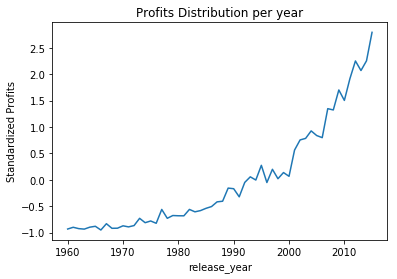

In [67]:
def grouping_data(x, column_name):
    return x.groupby(column_name)

# group data by release years
grouped_data_by_years = grouping_data(data, 'release_year')
grouped_profits_by_years = grouping_data(profitable_std_movies, 'release_year')

# standardize profits of movies per year
standardize(grouped_profits_by_years.sum()['profits_per_movie']).plot(title="Profits Distribution per year")
plt.ylabel("Standardized Profits")
plt.show()

**We can visualize from the above plot that the profits made by the movie in the 2010-2015 years time period are lot more than the profits made by the movies earlier.**


Correlation between revenue and budget (of the movies per year): 0.9059874665884495


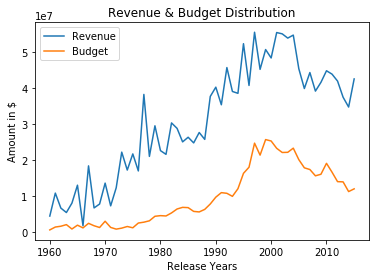

In [74]:
# checking whether the revenue collected for each movie is always higher than its budget or not
def mean_of_grouped_data(x, column_name):
    return x.mean()[column_name]

per_year_revenue = mean_of_grouped_data(grouped_data_by_years, 'revenue')
per_year_budget = mean_of_grouped_data(grouped_data_by_years, 'budget')

# finding correlation between revenue and budget per year
relation = (np.corrcoef(per_year_revenue, per_year_budget))[0, 1]
print("\nCorrelation between revenue and budget (of the movies per year): {}".format(relation))

# per_year_revenue.plot(label="Revenue")
# per_year_budget.plot(label="Budget")

plt.plot(from_1960_to_2015, per_year_revenue.values, label="Revenue")
plt.plot(from_1960_to_2015, per_year_budget.values, label="Budget")
plt.ylabel("Amount in $")
plt.xlabel("Release Years")
plt.title("Revenue & Budget Distribution")
plt.legend(loc='upper left')
plt.show()

**As the coorelation between revenue and budget (per year) is approx. 0.9. It depicts that both the budget and revenue (variables) are strongly correlated. So, it might be possible that the movie with higher budget also has higher movie revenues. But as the data is not cleaned yet so we cannot assure anything.**

**We can also see from this plot that the revenue has been mostly higher than the budget of the movie but this does not suggest that the movies will almost always be profitable as in some cases, the revenue and the budget have also not been reported (as discussed earlier). So, it may be a possibility that some of theses movies could have faced losses.**

In [48]:
# sort the table in descending order according to standardized popularity of the movies
profitable_std_movies = profitable_std_movies.sort_values(by='std_popularity', axis='index')
profitable_std_movies.head()

,budget,id,popularity,profits_per_movie,release_year,revenue,std_popularity
6181,0,18729,0.000065,0,1985,0,-0.646286
9977,0,32082,0.000188,0,1971,0,-0.646163
6080,0,174323,0.000620,0,2013,0,-0.645731
6551,0,31329,0.000973,0,2005,0,-0.645378
6961,0,15412,0.001115,0,2006,0,-0.645236


0.479958191675


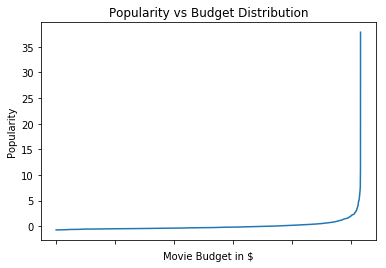

In [63]:
def correlation(x, y):
    std_x = standardize(x)
    std_y = standardize(y)
    return (std_x * std_y).mean()

def bool_index(x, column_name):
    return x[column_name].values != 0

index = bool_index(data, 'budget')
popular_vs_budget = correlation(data['budget'].values[index],
                                data['popularity'].values[index])
print(popular_vs_budget)

temp = pd.Series(standardize(profitable_std_movies['popularity'].values[index]),
                 index=[standardize(profitable_std_movies['budget'].values[index])])
temp.plot(title="Popularity vs Budget Distribution")
plt.ylabel("Popularity")
plt.xlabel("Movie Budget in $")
plt.show()

**From the above correlation, we can observe that the value 0.48 approx. is positive which depicts a strong relaitonship between budget and popularity of the movie.**

**Also, the graph shows us the same thing that when the budget (along the x-axis) of the movies increases, the popularity of the also increases. But this graph can be also misleading as the testing values are reduced to half in this case.**

0.629315667894


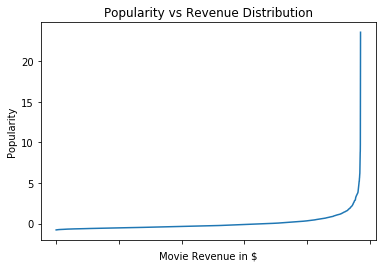

In [64]:
index = bool_index(profitable_std_movies, 'revenue')

popular_vs_rev = (np.corrcoef((profitable_std_movies['revenue'].values)[index],
                              (profitable_std_movies['popularity'].values)[index]))[0, 1]
print(popular_vs_rev)
temp = pd.Series(standardize(profitable_std_movies['popularity'].values[index]),
                 index=[standardize(profitable_std_movies['revenue'].values[index])])
temp.plot(title="Popularity vs Revenue Distribution")
plt.ylabel("Popularity")
plt.xlabel("Movie Revenue in $")
plt.show()

#### So, from the above correlation values 0.63 approx., between variables revenue and std_popularity, we can see that it is close to +1. Hence, we can see that there is a some STRONG relation between revenue and popularity. Because the Correlation value is > 0, which suggests that if one variable increases with certain margin the other will also increase with approx. similar margin as well. 
*We can say that revenue and popularity are closely and positively correlated.*

In [371]:
index = bool_index(profitable_std_movies, 'profits_per_movie')

popular_vs_profit = (np.corrcoef((profitable_std_movies['profits_per_movie'].values)[index],
                                 (profitable_std_movies['popularity'].values)[index])
                    )[0, 1]
print(popular_vs_profit)

0.615919873113


**Here, we can see that the variables profits_per_movie and std_popularity are also positively correlated (close to +1) which implies a STRONG relationship between both the variables. So, it may be a possibility that if a movie is more popular it may be more profitable also or vice versa. But not in all cases.**

# SUMMARY

1. The most popular genre from year to year is DRAMA (with a total of 17.6% drama movies) followed by Comedy (14.1%) as depicted by the plots above.
2. properties/attributes of the movies which are more popular:
    - We could see that some of the values in the budget (column) were 0. So, we did not include those 0 values for finding a similarity in our data. (Data Cleaning)
    - We found the similarity in our data by using Pearson's coefficient.
    - by the correlation value ablove, we can say that the budget of the movies contributes to the popularity of the movie at the box office, but 0.48 value is not a strong evidence to say so. So, it may or may not be the factor in some cases.
    - Similarly, we can also say that the revenue collected and the profit per movie can also be the factors or reasons towards the popularity of the movie as the correlation values for these variables with popularity variable are also positive and above 0.60. 
    - We are **tentatively** concluding above points but we don't have any concrete results as the correlation values are positive but not so close to +1.
    
**LIMITATIONS**
    - Incomplete Data: - Missing values, even the lack of a section like budget in this case (or a substantial part of the data), could limit its usability.
    - Due to lack of data regarding budget (as some fields were 0, thus, having no budget at all to analyse) we cannot entirely depend up on the data remaining after data cleaning to determine whether the above stated relationship is correct or not.
    - Because from the cleaned dataset we arrived at the (budget-popularity, revenue-popularity) relationship and since, almost half the dataset was removed dut to the unavailability of budget details, the above stated relationship is partially true.
    - So, the lack of budget data also makes our data analysis less reliable.

**FUTURE PLANS**

The report covers only some of the parameters like genres and release_years; revenue & popularity; budget & popularity, etc. There are many more parameters available in the data which can be analysed and expored further.
    - We can expore the vote count parametre a liitle more and check its relationship with the popularity parameter.
    - We can also see whether the cast plays any role in the revenue collection of a movie and the popularity of the movie or even in the vote count.
    